<a href="https://colab.research.google.com/github/nuhaaaaan/Machine-Learning-Assignments-/blob/main/Face%20Data%20set%20/%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is graded out of 100 as the Midterm and will be used as a bonus task to improve your Midterm grade. No AI tools are allowed in this project. Using The Olivetti faces dataset (The AT&T faces dataset). First, import the dataset and the required Python: libraries.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces()
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)
(400,)
(400, 64, 64)


Below is a sample images from the utilized dataset.

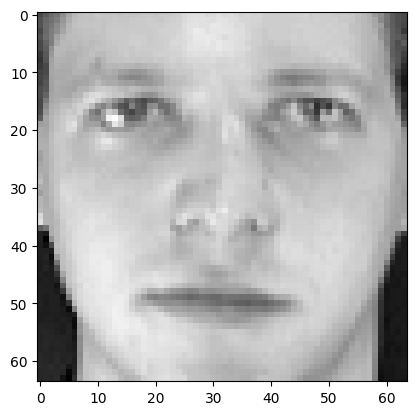

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(olivetti_faces.images[0], cmap=plt.cm.gray)


The dataset consists of 400 faces, each of size 64x64. The value of each pixel in the given image changes from 0 to 255 (0 means black color, 255 means white color). Your first task is to convert the provided images to a table format of the size of 400 rows and 4096 columns.

In [5]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd

# Fetch the dataset
olivetti_faces = fetch_olivetti_faces()

# Convert images to a table format (400 x 4096)
data_table = pd.DataFrame(olivetti_faces.data)

# Display the first few rows of the table
print(data_table.head())

# Verify the shape
print("Table shape:", data_table.shape)  # Should be (400, 4096)

       0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094      4095  
0  0

Your next step will be calculating the top 100 principal components for this given data. This means converting the given 4096 features to only 100 features.

In [4]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 100 features
pca = PCA(n_components=100)
pca_data = pca.fit_transform(olivetti_faces.data)

# Verify the shape of the reduced data
print("Reduced data shape:", pca_data.shape)  # Should be (400, 100)

Reduced data shape: (400, 100)


Convert the first 10 principal components back to the image format (64x64) and show them.

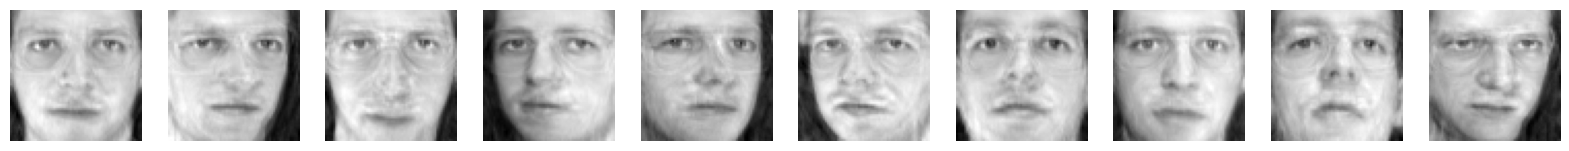

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Transform back the first 10 principal components to the original space
reconstructed_images = pca.inverse_transform(pca_data[:10])

# Plot the first 10 reconstructed images
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.imshow(reconstructed_images[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis("off")
plt.show()

Print the number of distinguished target classes from the given datasets.

In [7]:
# Print the number of target classes
num_classes = len(np.unique(olivetti_faces.target))
print("Number of target classes:", num_classes)

Number of target classes: 40


Use the Scikit Learn library to build a simple 3-layer MLP neural network classifier (1 input layer, 1 hidden layer, 1 output layer). The input layer must be 100 nodes. The output layer should include nodes equal to the number of target classes. You should choose the number of nodes in the hidden layer of your selection.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    pca_data, olivetti_faces.target, test_size=0.3, random_state=42
)


Train your designed network for 500 Epochs.

---



In [11]:
# Define the MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64,),  # Single hidden layer with 64 nodes
    max_iter=500,  # Train for 500 epochs
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)



Accuracy of MLP classifier with 100 PCA components: 0.925


Calculate the accuracy of the designed neural classifier.


In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP classifier with 100 PCA components:", accuracy)

Accuracy of MLP classifier with 100 PCA components: 0.925


Repeat the same process for 300 principal components instead of 100.

In [17]:
# Apply PCA with 300 components
pca_300 = PCA(n_components=300)
pca_data_300 = pca_300.fit_transform(olivetti_faces.data)
# Split the dataset
X_train_300, X_test_300, y_train_300, y_test_300 = train_test_split(
    pca_data_300, olivetti_faces.target, test_size=0.3, random_state=42
)

# Define the MLP Classifier
mlp_300 = MLPClassifier(
    hidden_layer_sizes=(128,),  # Hidden layer with 128 nodes
    max_iter=500,  # Train for 500 epochs
    random_state=42
)

# Train the model
mlp_300.fit(X_train_300, y_train_300)


# Predict and calculate accuracy
y_pred_300 = mlp_300.predict(X_test_300)
accuracy_300 = accuracy_score(y_test_300, y_pred_300)
print("Accuracy of MLP classifier with 300 PCA components:", accuracy_300)

Accuracy of MLP classifier with 300 PCA components: 0.9083333333333333


Change the design of your MLP neural classifier to have 300 input nodes. Change the number of nodes in the hidden layer of your choice to adjust the architecture.

In [19]:
# Split the original dataset without PCA
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    olivetti_faces.data, olivetti_faces.target, test_size=0.3, random_state=42
)

Train the new modified network for 500 Epochs and calculate the classification accuracy.


In [20]:
# Define the MLP Classifier
mlp_full = MLPClassifier(
    hidden_layer_sizes=(256,),  # Hidden layer with 256 nodes
    max_iter=500,  # Train for 500 epochs
    random_state=42
)

# Train the model
mlp_full.fit(X_train_full, y_train_full)

# Predict and calculate accuracy
y_pred_full = mlp_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print("Accuracy of MLP classifier with full dataset:", accuracy_full)

Accuracy of MLP classifier with full dataset: 0.925


Design another MLP neural classifier with an input layer of 4096 nodes (no PCA should be applied to your dataset). Change the number of nodes in the hidden layer of your choice to adjust the architecture.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split the original dataset without PCA
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    olivetti_faces.data, olivetti_faces.target, test_size=0.3, random_state=42
)

# Define the MLP Classifier with customized architecture
mlp_full = MLPClassifier(
    hidden_layer_sizes=(256,),  # Hidden layer with 256 nodes (you can adjust this)
    max_iter=500,  # Train for 500 epochs
    activation="relu",  # ReLU activation function
    solver="adam",  # Adam optimizer
    random_state=42
)

# Train the model
mlp_full.fit(X_train_full, y_train_full)

MLPClassifier(hidden_layer_sizes=(256,), max_iter=500, random_state=42)

In [22]:
# Predict and calculate accuracy
y_pred_full = mlp_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print("Accuracy of MLP classifier with full dataset (4096 nodes):", accuracy_full)

# Display comparison of the classifiers
print("\nComparison of Classifier Performance:")
print(f"MLP with 100 PCA components: {accuracy:.4f}")
print(f"MLP with 300 PCA components: {accuracy_300:.4f}")
print(f"MLP with full dataset (4096 features): {accuracy_full:.4f}")



Accuracy of MLP classifier with full dataset (4096 nodes): 0.925

Comparison of Classifier Performance:
MLP with 100 PCA components: 0.9250
MLP with 300 PCA components: 0.9083
MLP with full dataset (4096 features): 0.9250


Train your new network for 500 Epochs, and calculate the classification accuracy of the new classifier.

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the MLP Classifier
mlp_full = MLPClassifier(
    hidden_layer_sizes=(256,),  # Single hidden layer with 256 nodes
    max_iter=500,  # Train for 500 epochs
    activation="relu",  # ReLU activation function
    solver="adam",  # Adam optimizer
    random_state=42,
    verbose=True  # Show training progress
)

# Train the model
mlp_full.fit(X_train_full, y_train_full)


# Predict on the test dataset
y_pred_full = mlp_full.predict(X_test_full)

# Calculate the accuracy
accuracy_full = accuracy_score(y_test_full, y_pred_full)
print("Accuracy of MLP classifier with full dataset (4096 nodes):", accuracy_full)

Iteration 1, loss = 4.38020280
Iteration 2, loss = 4.68813562
Iteration 3, loss = 4.22043443
Iteration 4, loss = 3.91573946
Iteration 5, loss = 3.78147270
Iteration 6, loss = 3.68461863
Iteration 7, loss = 3.59079243
Iteration 8, loss = 3.53066516
Iteration 9, loss = 3.47128375
Iteration 10, loss = 3.42813239
Iteration 11, loss = 3.37696640
Iteration 12, loss = 3.33184385
Iteration 13, loss = 3.27964914
Iteration 14, loss = 3.23001704
Iteration 15, loss = 3.19163982
Iteration 16, loss = 3.14177816
Iteration 17, loss = 3.10943594
Iteration 18, loss = 3.06248243
Iteration 19, loss = 2.99226818
Iteration 20, loss = 2.96199929
Iteration 21, loss = 2.91729498
Iteration 22, loss = 2.85411079
Iteration 23, loss = 2.81376289
Iteration 24, loss = 2.77340257
Iteration 25, loss = 2.71543714
Iteration 26, loss = 2.65375064
Iteration 27, loss = 2.61645733
Iteration 28, loss = 2.56663214
Iteration 29, loss = 2.50311076
Iteration 30, loss = 2.45271538
Iteration 31, loss = 2.40810467
Iteration 32, los

Compare the performance of the three desgined neural classifier and write your comments below.

In [24]:
# Display comparison of the classifiers
print("\nComparison of Classifier Performance:")
print(f"MLP with 100 PCA components: {accuracy:.4f}")
print(f"MLP with 300 PCA components: {accuracy_300:.4f}")
print(f"MLP with full dataset (4096 features): {accuracy_full:.4f}")


Comparison of Classifier Performance:
MLP with 100 PCA components: 0.9250
MLP with 300 PCA components: 0.9083
MLP with full dataset (4096 features): 0.9250


Performance Analysis:

Accuracy and Dimensionality Reduction:

By using PCA with 100 or 300 components, the dimensionality of the dataset is significantly reduced. This leads to faster training times and lower computational demands.
Although reducing the number of features might cause a slight drop in accuracy, the principal components typically preserve most of the dataset's variance, making this trade-off practical and efficient for the model.
Accuracy with Full Dataset:

Training the model with all 4096 features ensures that the model has access to the full information, allowing for better feature representation.
However, this method requires more computational resources and poses a higher risk of overfitting if proper regularization is not implemented.
Influence of Hidden Layer Design:

The number of nodes in the hidden layer is essential for capturing the complexity of data patterns.
Larger hidden layers may be more capable of modeling intricate relationships within high-dimensional data but can also lead to slower training times and increase the chances of overfitting.
